In [22]:
import pandas as pd
pd.options.display.float_format = '{:,.2%}'.format
import numpy as np
from matplotlib import pyplot as plt
import re
df = pd.read_csv('summary.csv', names=['ga', 'problem', 'ell', 'nfe_mean', 'nfe_std'], skiprows=1)
df = df[df['ga'] != 'dsmga2-tos-ftf_mfN']
df = df[df['ga'] != 'dsmga2-tos-ftf_cntN']

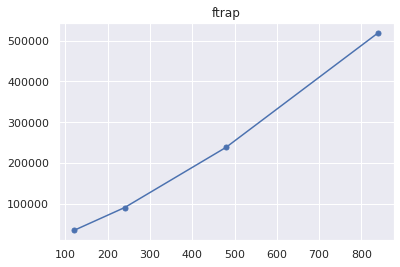

In [23]:
import seaborn as sns
sns.set()

def plot_scalability(problem):
    global df

    problem_to_ells = {
        'mktrap': [100, 200, 400, 800],
        'ftrap': [120, 240, 480, 840],
        'cyctrap': [100, 200, 400, 800],
    }
    df_tmp = df[(df['ga'].isin(['FFF'])) & (df['problem'] == problem) & (df['ell'].isin(problem_to_ells[problem]))]
    df_tmp = df_tmp.sort_values(by='ell', ascending=True)
    x = df_tmp['ell'].values
    y = df_tmp['nfe_mean'].values
    
    plt.title(problem)
    plt.plot(x, y, marker='.', markersize=10)
    plt.show()
    plt.close()

plot_scalability(problem='ftrap')

In [24]:
def examine(problem, ell, ga=None, neat=False):
    global df
    cond = np.logical_and(df['problem'] == problem, df['ell'] == ell)
    
    if ga:
        all_ga_list = df[cond]['ga'].values
        selected_ga_list = []
        # patter_list = [re.compile(x) for x in ga]
        for x in all_ga_list:
            # for pattern in patter_list:
            for pattern in ga:
                # if pattern.match(x):
                if pattern in x:
                    selected_ga_list.append(x)
                    break
        
        cond = np.logical_and(cond, df['ga'].isin(selected_ga_list))
    
    res = df[cond].sort_values('nfe_mean', ignore_index=True)
    if neat:
        res['nfe_mean'] = (res['nfe_mean'] // 1000).astype(int)
        res['nfe_std'] = (res['nfe_std'] // 1000).astype(int)
    return res

In [60]:
problem = 'USal_NSize_3_7'
original_df = df[np.logical_and(df['ga']=='FFF', df['problem']==problem)].sort_values('ell')
trimming_df = df[np.logical_and(df['ga']=='TFF_MEAN', df['problem']==problem)].sort_values('ell')
A = trimming_df['nfe_mean'][trimming_df['ell']==100].astype(float).values
B = original_df['nfe_mean'][original_df['ell']==100].astype(float).values
print((A - B) / B)

USal_NSize_3_7 = [-0.0394717, -0.09305784, -0.09914299, -0.07176291]
USal_NSize_3_10 = [0.02958239, -0.01070663, -0.00255336, -0.00234819]


[-0.0394717]


In [63]:
examine(problem='mktrap', ell=400, neat=True)

,ga,problem,ell,nfe_mean,nfe_std
0,TFF_MEDIAN,mktrap,400,45,3
1,TFF_MAX,mktrap,400,46,1
2,TFF_MEAN,mktrap,400,46,1
3,TTF_MEAN_MOE,mktrap,400,48,3
4,TTT_MEAN_MOG_S,mktrap,400,48,2
5,FTF_MFE,mktrap,400,49,6
6,TTT_MEAN_MOE_S,mktrap,400,49,5
7,FTT_MOG_S,mktrap,400,49,2
8,dsmga2-tos-tft,mktrap,400,50,4
9,dsmga2-tos-ftf_moN,mktrap,400,51,1


In [12]:
examine(problem='USal_NSize_3_10', ell=100, neat=True)

,ga,problem,ell,nfe_mean,nfe_std
0,FFF,USal_NSize_3_10,100,47,16
1,TFF_MEAN,USal_NSize_3_10,100,49,11


In [4]:
examine(problem='nk', ell=400, ga=None, neat=True)

,ga,problem,ell,nfe_mean,nfe_std
0,TTT_MEAN_CE_S,nk,400,596,290
1,TTF_MEAN_CE,nk,400,606,310
2,TFF_MEDIAN,nk,400,630,313
3,TTF_MEAN_MOE,nk,400,636,325
4,TFF_MEAN,nk,400,636,338
5,TTT_MEAN_MOE_S,nk,400,638,329
6,TTT_MEAN_MOG_S,nk,400,656,313
7,TTF_MEAN_MOG,nk,400,658,325
8,TTT_MEAN_CG_S,nk,400,660,346
9,TTF_MEAN_CG,nk,400,670,369


In [5]:
examine(problem='sat', ell=100, ga=None, neat=True)

,ga,problem,ell,nfe_mean,nfe_std
0,TTT_MEAN_MOE_S,sat,100,159,217
1,TTT_MEAN_MOG_S,sat,100,162,237
2,TFF_MEAN,sat,100,167,239
3,TTF_MEAN_CG,sat,100,169,241
4,TTT_MEAN_CG_S,sat,100,170,229
5,FTF_CG,sat,100,170,237
6,FTF_CE,sat,100,171,240
7,TTT_MEAN_CE_S,sat,100,171,237
8,TTF_MEAN_MOG,sat,100,171,246
9,FTF_MOG,sat,100,172,218


In [5]:
examine(problem='cyctrap', ell=400, ga=None, neat=True)

,ga,problem,ell,nfe_mean,nfe_std
0,FTF_CE,cyctrap,400,92,19
1,TTT_MEAN_CE_S,cyctrap,400,97,13
2,TTF_MEAN_CE,cyctrap,400,97,9
3,TTT_MEAN_CG_S,cyctrap,400,108,13
4,dsmga2-tos-ftt_moE,cyctrap,400,110,16
5,FTF_MOE,cyctrap,400,112,17
6,TTT_MEAN_MOE_S,cyctrap,400,113,17
7,FTF_CG,cyctrap,400,115,22
8,TTF_MEAN_CG,cyctrap,400,116,21
9,FTF_MFE,cyctrap,400,117,10


In [3]:
examine(problem='ftrap', ell=480, ga=None, neat=True)

,ga,problem,ell,nfe_mean,nfe_std
0,dsmga2-tos-ftf_cntG,ftrap,480,177,1
1,TTF_MEAN_CG,ftrap,480,178,5
2,dsmga2-tos-ftt_count,ftrap,480,180,6
3,dsmga2-tos-ftf_cntE,ftrap,480,200,2
4,TTF_MEAN_CE,ftrap,480,202,1
5,TTT_MEAN_CG_S,ftrap,480,203,5
6,TTF_MEAN_MOG,ftrap,480,215,3
7,dsmga2-tos-ftf_moN,ftrap,480,222,3
8,TTT_MEAN_CE_S,ftrap,480,223,3
9,TFF_MEDIAN,ftrap,480,226,3


In [3]:
examine(problem='spin', ell=400, ga=None, neat=True)

,ga,problem,ell,nfe_mean,nfe_std
0,TTT_MEAN_CG_S,spin,400,160,68
1,TTF_MEAN_CG,spin,400,164,80
2,TTF_MEAN_MOG,spin,400,167,62
3,TTF_MEAN_CE,spin,400,171,83
4,TTT_MEAN_CE_S,spin,400,172,60
5,TFF_MEAN,spin,400,175,71
6,TFF_MEDIAN,spin,400,182,80
7,TTF_MEAN_MOE,spin,400,185,74
8,TTT_MEAN_MOG_S,spin,400,192,75
9,TTT_MEAN_MOE_S,spin,400,194,67


In [5]:
examine(problem='maxcut', ell=100, ga=None, neat=True)

,ga,problem,ell,nfe_mean,nfe_std
0,TTF_MEAN_CG,maxcut,100,273,218
1,TTF_MEAN_MOG,maxcut,100,275,289


In [28]:
examine('spin', 400, ga=['TFT_MEAN_S'])

,ga,problem,ell,nfe_mean,nfe_std


In [56]:
d_list = []

problem_list = ['mktrap', 'ftrap', 'cyctrap', 'nk', 'spin', 'sat', 'maxcut']
ell_list = [400, 480, 400, 400, 400, 100, 100]
ga_list = ['TTT_MEAN_CG_S', 'TTT_MEAN_CE_S', 'TTT_MEAN_MOE_S', 'TTT_MEAN_MOG_S', 'FFF']
# ga_list = ['TFF_MEAN', 'TFF_MEDIAN', 'TFF_MAX', 'FFF']
# ga_list = ['FFT_S', 'FFF']
# ga_list = ['FTF_MOE', 'FTF_MOG', 'FTF_CE', 'FTF_CG', 'FTF_MFE', 'FTF_MFG', 'FFF']
# ga_list = ['TFT_MEAN_S', 'TFT_MEDIAN_S', 'FTT_CG_S', 'FFF']
# ga_list = ['TTF_MEAN_CG', 'FFF']

for problem, ell in zip(problem_list, ell_list):
    # base = df[df['ga'] == 'dsmga2-tos-fff']['nfe_mean'].values
    tmp_df = df[(df['problem']==problem) & (df['ell']==ell)].loc[df['ga'].isin(ga_list)]
    base = tmp_df[tmp_df['ga'] == 'FFF']['nfe_mean'].values
    k = tmp_df['ga'].values
    v = (tmp_df['nfe_mean'].values - base)/base
    # print(v)
    d_list.append(dict(zip(k, v.T)))

df_list = []

for d, problem in zip(d_list, problem_list):
    df_list.append(pd.DataFrame(data=d.values(), index=d.keys(), columns=[problem]))

df_rank = pd.concat(df_list, axis=1)
df_rank['mean [4:]'] = df_rank.iloc[:,4:].mean(axis=1)
df_rank['mean [4:]'].sort_values
df_rank = df_rank.sort_values('mean [4:]')
df_rank

,mktrap,ftrap,cyctrap,nk,spin,sat,maxcut,mean [4:]
TTT_MEAN_CG_S,-0.05%,-15.04%,-3.56%,-2.78%,-21.69%,-2.11%,-56.66%,-26.82%
TTT_MEAN_CE_S,12.14%,-6.09%,-16.97%,-12.15%,-15.83%,-1.32%,-54.17%,-23.77%
TTT_MEAN_MOG_S,-8.83%,6.89%,14.35%,-3.30%,-6.16%,-6.83%,-53.12%,-22.04%
TTT_MEAN_MOE_S,-6.29%,11.23%,-3.24%,-5.94%,-5.33%,-8.48%,-51.71%,-21.84%
FFF,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
